# Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.

In [2]:
import pandas as pd

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/diabetes_.csv');
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [8]:
#  Displaying first few rows
data.head()

#  Finding all datas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
# Finding missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Finding summary statistics
print(data.describe(include="all"))

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [11]:
# Columns where zero is invalid
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    data[col] = data[col].replace(0, data[col].mean())

data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3. Feature Engineering:


• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [13]:
import numpy as np

In [12]:
# Separate features and target
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

In [14]:
# Train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size = int(len(X) * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [15]:
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

X_train.shape, X_test.shape

((538, 8), (230, 8))

4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

In [16]:
def euclidean_distance(p1, p2):
  return np.sqrt(np.sum((p1 - p2) ** 2))

• Write functions for:

– Predicting the class for a single query.


In [17]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    return np.bincount(nearest_labels).argmax()

– Predicting classes for all test samples.

In [18]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

• Evaluate the performance using accuracy.

In [19]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

In [20]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, predictions)

print(f"Accuracy (Original Data): {accuracy_original:.2f}%")

Accuracy (Original Data): 70.43%


# Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [21]:
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [23]:
X_scaled = min_max_scaling(X)
Xs_train, Xs_test, ys_train, ys_test = train_test_split_scratch(X_scaled, y)

In [24]:
pred_scaled = knn_predict(Xs_test, Xs_train, ys_train, k=3)
accuracy_scaled = compute_accuracy(ys_test, pred_scaled)

print(f"Accuracy (Scaled Data): {accuracy_scaled:.2f}%")

Accuracy (Scaled Data): 75.22%


Scaling improved KNN because distance-based models are sensitive to feature magnitude.

Usually, like in this case, scaled data gives higher accuracy.

# Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.


In [25]:
import time

k_values = range(1, 16)

orig_acc, scaled_acc = [], []
orig_time, scaled_time = [], []

for k in k_values:
    start = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    orig_time.append(time.time() - start)
    orig_acc.append(compute_accuracy(y_test, preds))

    start = time.time()
    preds = knn_predict(Xs_test, Xs_train, ys_train, k)
    scaled_time.append(time.time() - start)
    scaled_acc.append(compute_accuracy(ys_test, preds))

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.


In [27]:
import matplotlib.pyplot as plt

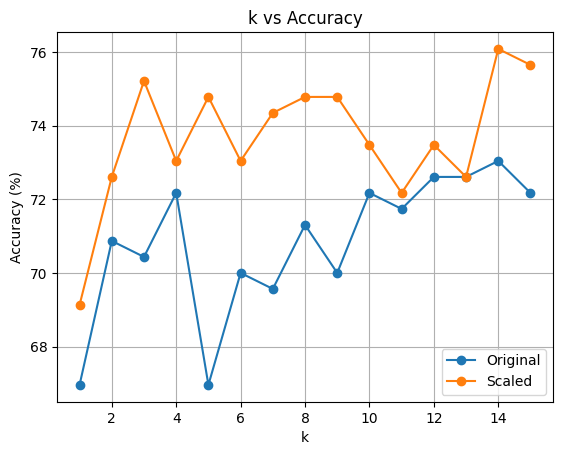

In [29]:
plt.figure()
plt.plot(k_values, orig_acc, marker='o', label='Original')
plt.plot(k_values, scaled_acc, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()

– k vs. Time Taken for original and scaled datasets.

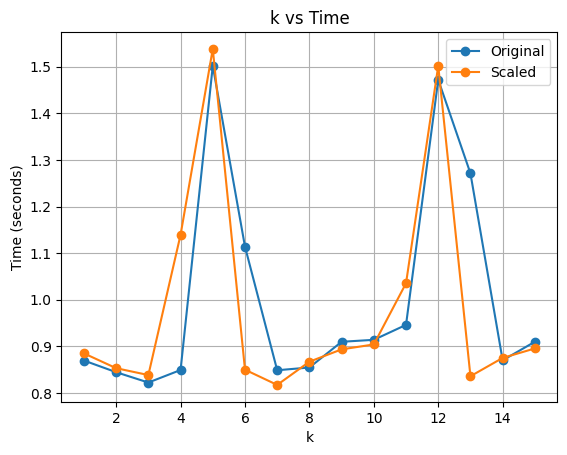

In [30]:
plt.figure()
plt.plot(k_values, orig_time, marker='o', label='Original')
plt.plot(k_values, scaled_time, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time")
plt.legend()
plt.grid()
plt.show()

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

When k is small, the KNN model tends to have low and inconsistent accuracy because it is highly sensitive to noise. As k increases, accuracy improves since the model considers more neighbors, making predictions more stable and reliable. Additionally, the scaled dataset consistently outperforms the unscaled one because scaling ensures that distance calculations are fairer across features.

• Identify the optimal k based on your analysis.

From the plots, **the optimal value of *k* is around 7–9**, where the scaled data gives the highest accuracy without increasing computation time too much.

# Problem - 4 -

Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.


KNN can be computationally expensive for large datasets because it needs to calculate distances between each test sample and all training samples. It also requires significant memory to store the entire training set. In high-dimensional data, the “curse of dimensionality” reduces the usefulness of distances, leading to less accurate predictions. Furthermore, KNN is sensitive to irrelevant features and variations in feature scales, which can further degrade its performance.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

KNN can be made more efficient in several ways. Using methods like KD-Trees or Ball Trees reduces the number of distance calculations, speeding up predictions. Dimensionality reduction techniques such as PCA simplify the feature space, making distances more meaningful and faster to compute. Scaling features ensures that no single feature dominates the distance calculation. Choosing the best K value through cross-validation helps improve accuracy. Additionally, clustering can be used to limit the search space, which also speeds up predictions.